In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# 1. Veri setini yükleme
df = pd.read_csv('Fraud.csv')

# Kategorik verilerin sayısallaştırılması
df['type'] = df['type'].astype('category').cat.codes



In [6]:
# 2. Özellikler ve hedef değişkeni ayırma
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Kişisel veriler çıkarılıyor
y = df['isFraud']



In [7]:
# 3. Özellikleri normalleştirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [8]:
# 4. Özellik boyutunu düşürme (PCA) - Özellik sayısına göre bileşen sayısını ayarlıyoruz
n_components = min(8, X.shape[1])  # Özellik sayısından büyük olmamalıdır
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)



In [9]:
# 5. Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [10]:
# 6. SVM modelini oluşturma ve eğitme
svm_model = LinearSVC(random_state=42, max_iter=10000, dual='auto')
svm_model.fit(X_train, y_train)



LinearSVC(dual='auto', max_iter=10000, random_state=42)

In [11]:
# 7. Test verisiyle tahmin yapma
y_pred = svm_model.predict(X_test)



In [12]:
# 8. Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 9. Sonuçları yazdırma
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")



Doğruluk (Accuracy): 0.9992
Kesinlik (Precision): 0.9548
Duyarlılık (Recall): 0.3784
F1 Skoru: 0.5420


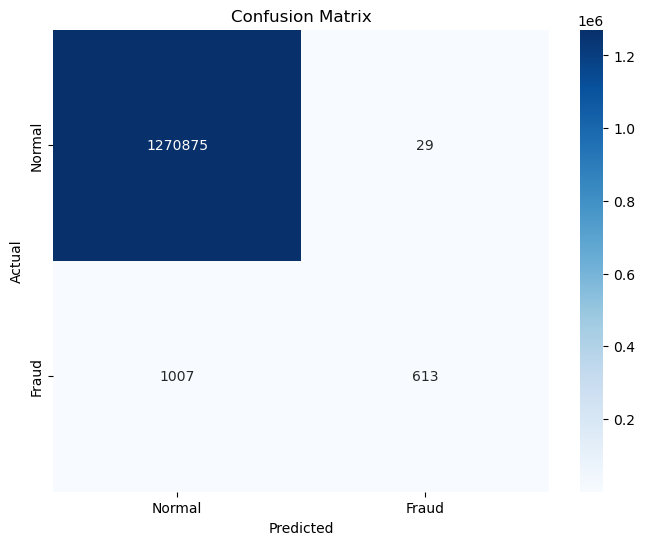

In [13]:
# 10. Karışıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



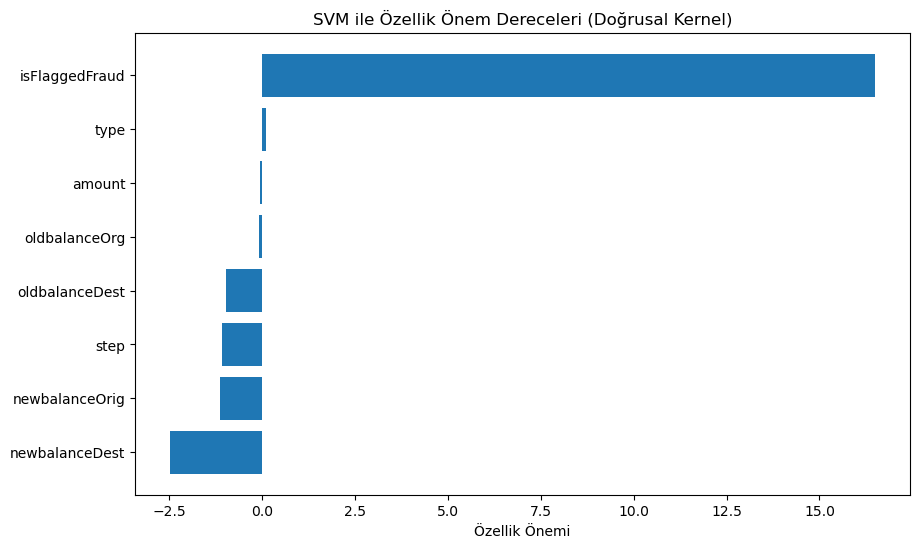

In [14]:
# 11. Özelliklerin önemini görselleştirme (Linear SVM ile)
feature_importance = svm_model.coef_[0]

# Özellik isimlerini eşleştirme ve sıralama
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Özellik Önemi')
plt.title('SVM ile Özellik Önem Dereceleri (Doğrusal Kernel)')
plt.show()

